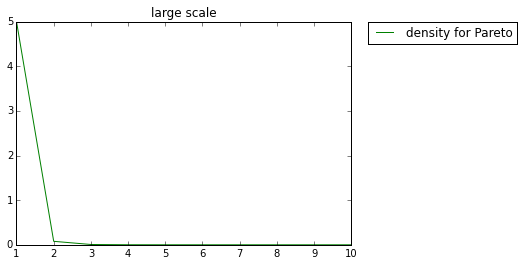

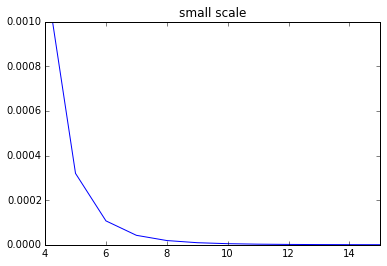

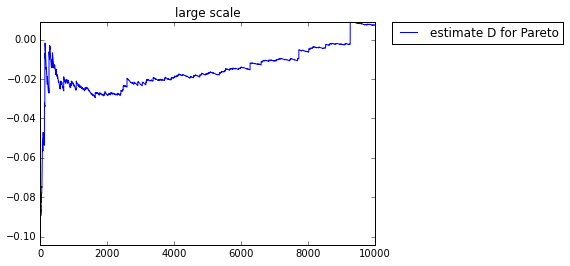

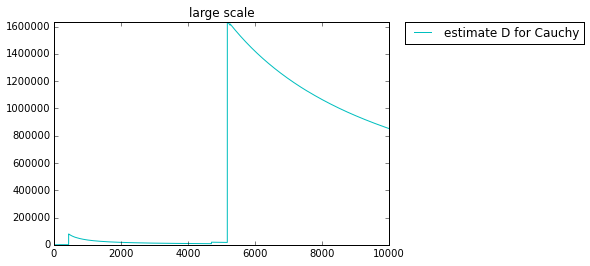

ok


In [11]:
import numpy as nmp
import scipy as scp
import matplotlib.pyplot as plt
import scipy.stats as sps
#import sympy as sy
from sympy import Symbol
%matplotlib inline 

# функция для расчета функции плотности
def _pdf(F, N):
    F[0] = 0
    for i in range(1, N):
        F[i] = 5 / (i ** 6)
    return F

N = 10000
X_p = nmp.random.pareto(5, N)

# считаем  функцию плотности
axis_x = nmp.arange(0, N, 1)
F = [0.0] * N
F = _pdf(F, N)

# строим график
plt.plot(axis_x, sps.pareto.pdf(axis_x, 5), '-g', label = "density for Pareto")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('large scale')
# добавляем точки на ось OY
plt.scatter(nmp.zeros(N), X_p)
plt.axis([1, 10, 0, max(F)]) 
plt.show()

# увеличим масштаб
plt.plot(axis_x, sps.pareto.pdf(axis_x, 5))
plt.title('small scale')
plt.axis([4, 15, 0, 0.001]) 
plt.show()

# посчитаем оценку дисперсии для распределения Парето
S_p = [0.0] * (N - 2)
S_p[0] = 0
sumn_sq = 0
sumn = 0
D_p = 5/((5 - 1) ** 2) / (5 - 2)

for i in range(1, N - 2):
    sumn_sq = sumn_sq + X_p[i + 2] ** 2
    sumn = sumn + X_p[i + 2]
    S_p[i] = (sumn_sq / i) - ((sumn / i) ** 2) - D_p
    
# построим график оценки дисперсии для распределения Парето 
axis_x = nmp.arange(0, N - 2, 1)
plt.plot(axis_x, S_p, '-b', label = "estimate D for Pareto")
plt.title('large scale')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.axis([0, N - 2, min(S_p), max(S_p)]) 
plt.show()

# посчитаем оценку для распределения Коши
X_c = nmp.random.standard_cauchy(N)
S_c = [0.0] * N
S_c[0] = 0
sumn_sq = 0
sumn = 0

for i in range (1, N):
    sumn_sq = sumn_sq + X_c[i] ** 2
    sumn = sumn + X_c[i]
    S_c[i] = (sumn_sq / i) - ((sumn / i) ** 2)

# построим график оценки дисперсии для распределения Коши
axis_x = nmp.arange(0, N, 1)
plt.plot(axis_x, S_c, '-c', label = "estimate D for Cauchy")
plt.title('large scale')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.axis([0, 10000, min(S_c), max(S_c)]) 
plt.show()

print("ok")